In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



# 1. Random walk on Erdös-Rényi networks

In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [3]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

### the function that can creat the graph and plot the mean and std

In [12]:
graph_rw = function (graph){
    
    #start_node = sample(1:vcount(graph), 1)
    l = c()
    s_t.mean = c()
    s_t.sd = c()
    node_degree = c()
    steps = 100
    transition_matrix = create_transition_matrix(graph)
    
    for (start_node in sample(1:vcount(graph), vcount(graph))) {
        v_last = random_walk(graph, steps, start_node, transition_matrix)
        shortpath = shortest.paths(graph, start_node, v_last)
        l <- append(l, shortpath)
        s_t.mean <- append(s_t.mean, mean(l))
        s_t.sd <- append(s_t.sd, sd(l))
        node_degree <- append(node_degree, degree(graph, v_last))
    }
    
    layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
    plot(s_t.mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
    plot(s_t.sd, main="the std of the distance vs step",xlab="step",ylab="std")
    hist(node_degree)
    hist(degree(graph))
}

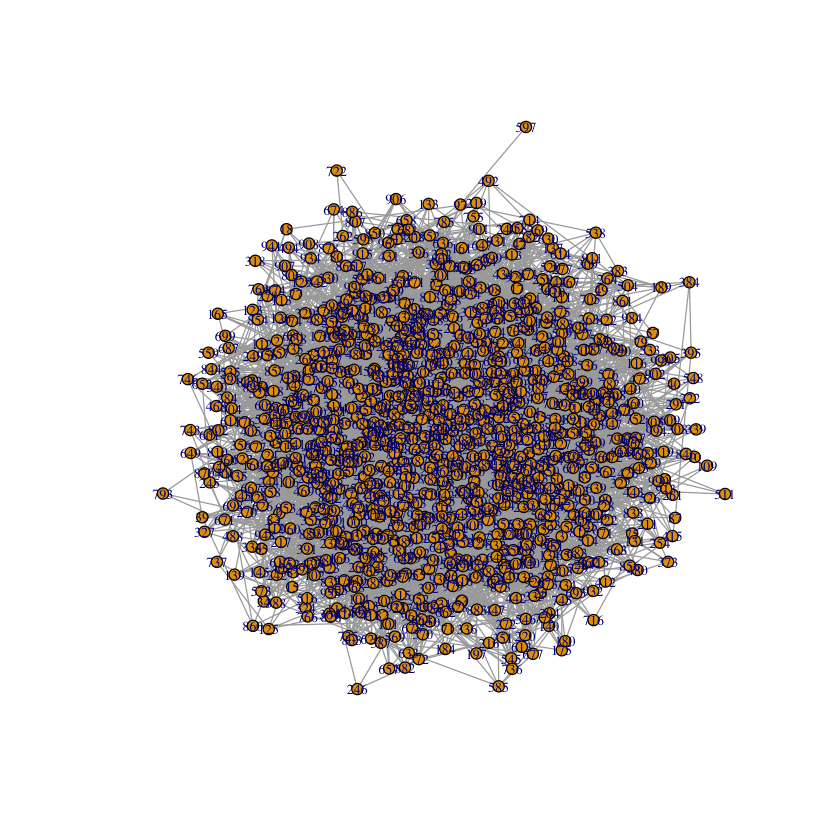

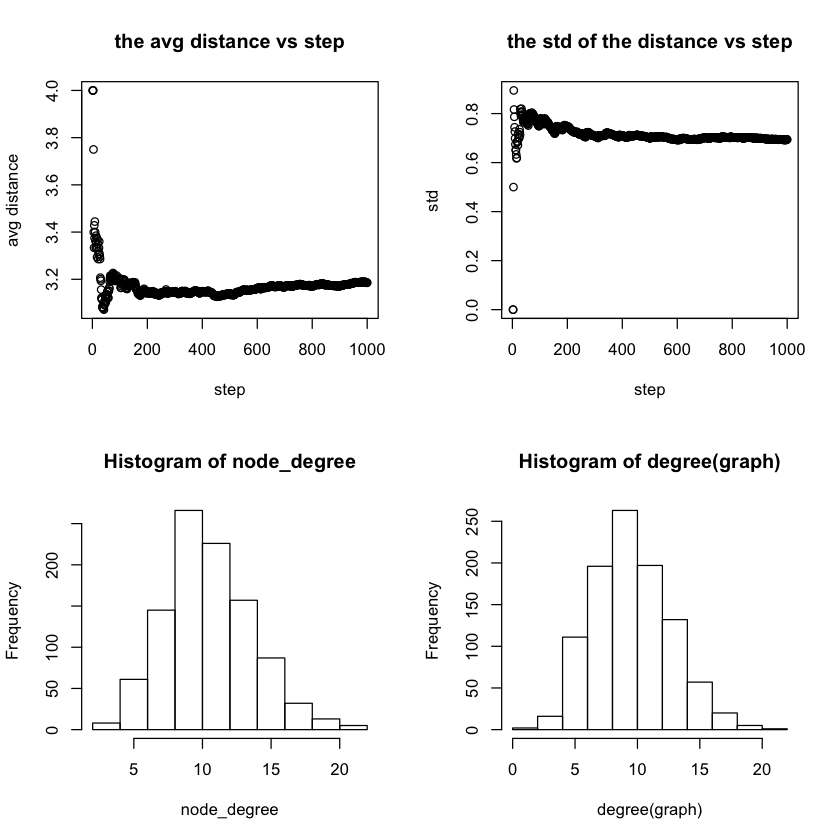

In [13]:
# creat 1000 nodes with p = 0.01

set.seed(0)
g1 <- random.graph.game(1000, p = 0.01, directed = F)
plot(g1,vertex.size=4, vertex.label.cex=0.7)
graph_rw(g1)

In [18]:
is.connected(g1)

[1] TRUE

In [19]:
diameter(g1, directed = FALSE, unconnected = FALSE)

[1] 6

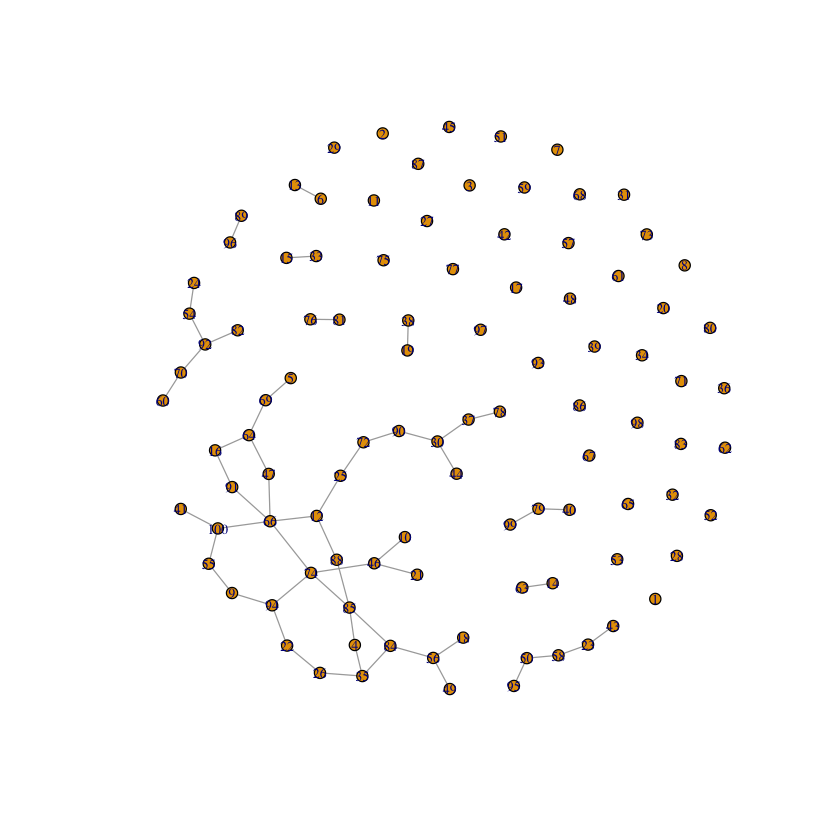

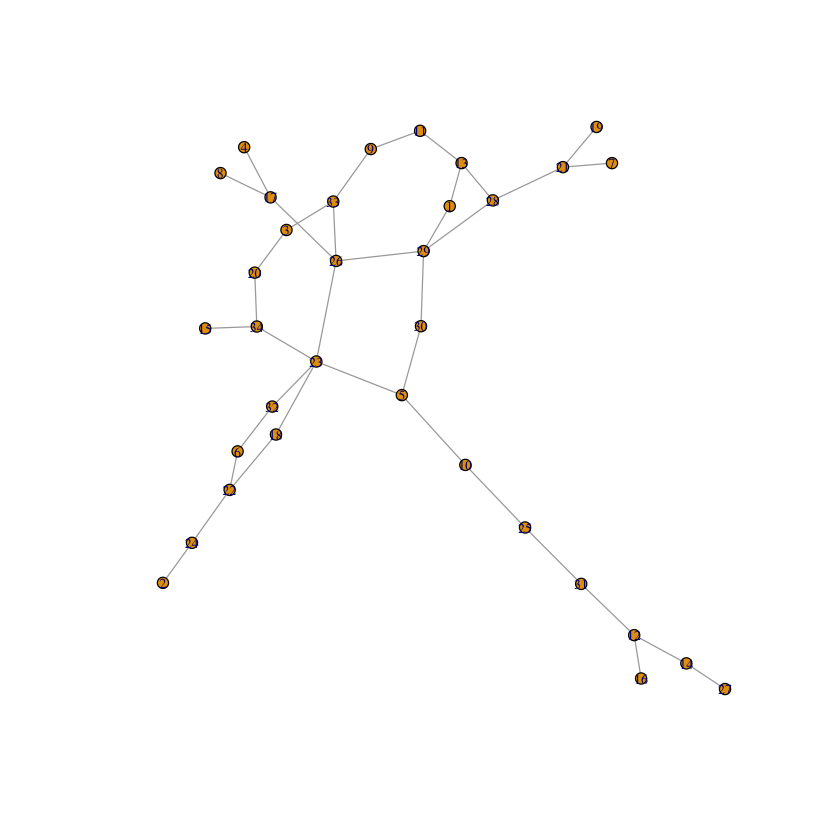

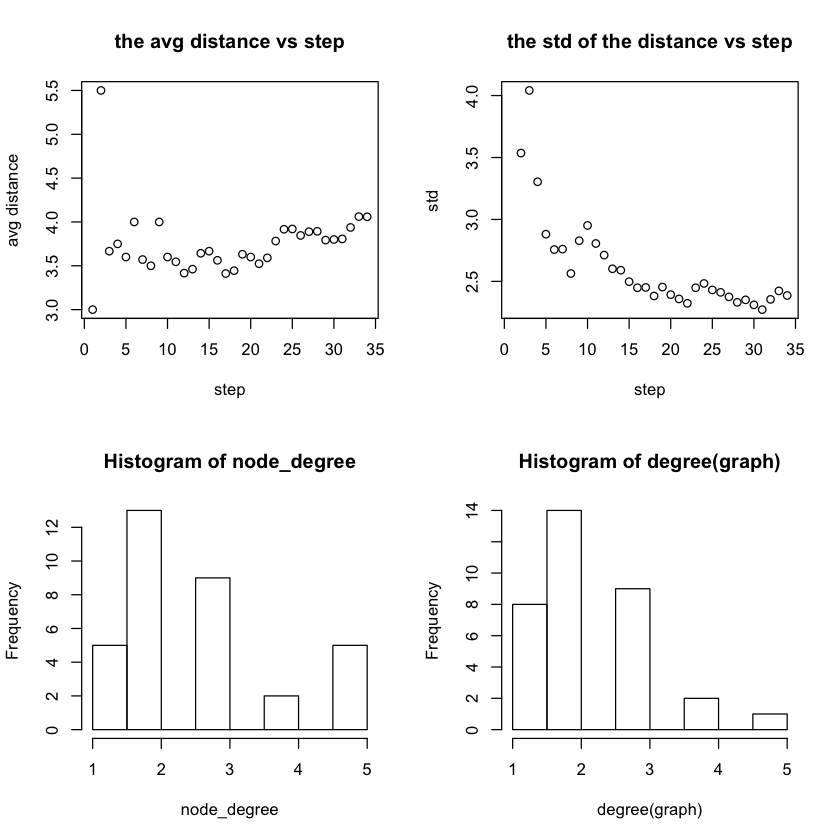

In [26]:
# creat 100 nodes with p = 0.01
set.seed(1)
g100 <- random.graph.game(100, p = 0.01, directed = F)
plot(g100,vertex.size=4, vertex.label.cex=0.7)
g.components <- clusters(g100)
ix <- which.max(g.components$csize)
g2 <- induced.subgraph(g100, which(g.components$membership == ix))
plot(g2,vertex.size=4, vertex.label.cex=0.7)
graph_rw(g2)

In [20]:
diameter(g2, directed = FALSE, unconnected = TRUE)

[1] 11

In [22]:
# creat 10000 nodes with p = 0.01

set.seed(0)
g3 <- random.graph.game(10000, p = 0.01, directed = F)
#plot(g3,vertex.size=4, vertex.label.cex=0.7)


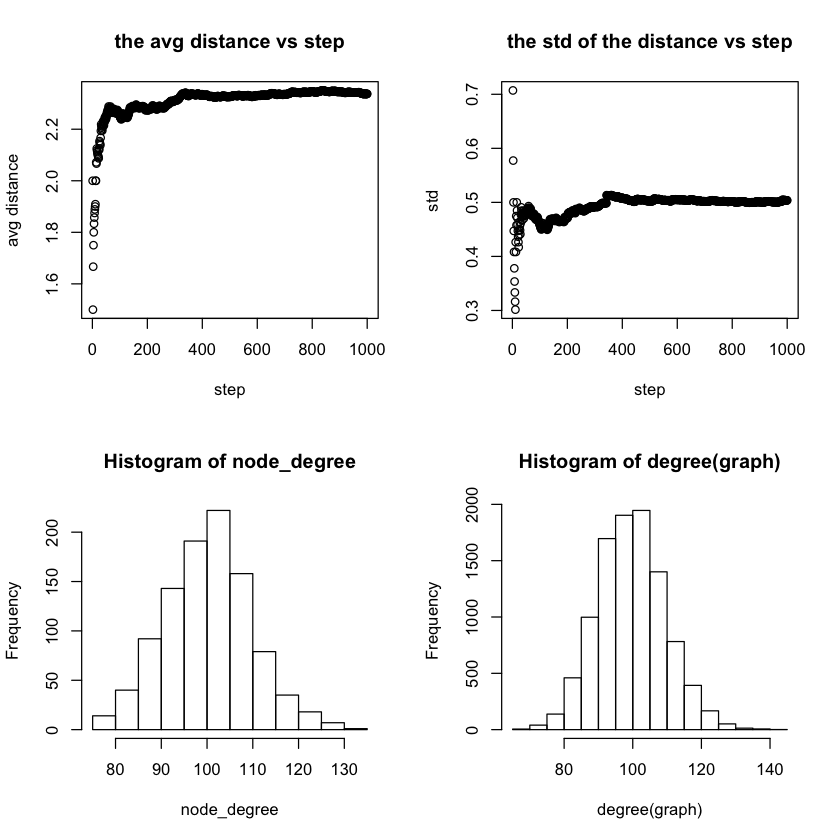

In [23]:
graph = g3
l = c()
s_t.mean = c()
s_t.sd = c()
node_degree = c()
steps = 100
transition_matrix = create_transition_matrix(graph)

for (start_node in sample(1:vcount(graph), 1000)) {
    v_last = random_walk(graph, steps, start_node, transition_matrix)
    shortpath = shortest.paths(graph, start_node, v_last)
    l <- append(l, shortpath)
    s_t.mean <- append(s_t.mean, mean(l))
    s_t.sd <- append(s_t.sd, sd(l))
    node_degree <- append(node_degree, degree(graph, v_last))
}

layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(s_t.mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
plot(s_t.sd, main="the std of the distance vs step",xlab="step",ylab="std")
hist(node_degree)
hist(degree(graph))

In [24]:
is.connected(g3)

[1] TRUE

In [25]:
diameter(g3, directed = FALSE, unconnected = FALSE)

[1] 3